In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, train_test_split

from data_loaders import PetFinderDataModule

In [4]:
TRAIN_DIR = "data/train"
TEST_DIR = "data/test"

In [26]:
df = pd.read_csv("data/train.csv")

skf = StratifiedKFold(5, shuffle=True)
columns = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

for batch, (train_idx, val_idx) in enumerate(skf.split(df["Id"], df["Pawpularity"])):
    df_train = df.loc[train_idx].reset_index()
    df_val = df.loc[val_idx].reset_index()

    clf = SVR(C=1.0, epsilon=0.2, max_iter=5000)
    X_train = df_train[columns].values
    y_train = df_train["Pawpularity"].values
    clf.fit(X_train, y_train)

    X_val = df_val[columns].values
    y_val = df_val["Pawpularity"].values
    predictions = clf.predict(X_val)

    rmse = mean_squared_error(predictions, y_val, squared=False)
    print(f"Batch {batch+1} RMSE: {rmse}")

d:\Desktop\Programming\CZ4041-Project\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Batch 1 RMSE: 21.193570002585716
Batch 2 RMSE: 21.092160636724238
Batch 3 RMSE: 21.157619357967697
Batch 4 RMSE: 21.192116832929102
Batch 5 RMSE: 21.038372128354474


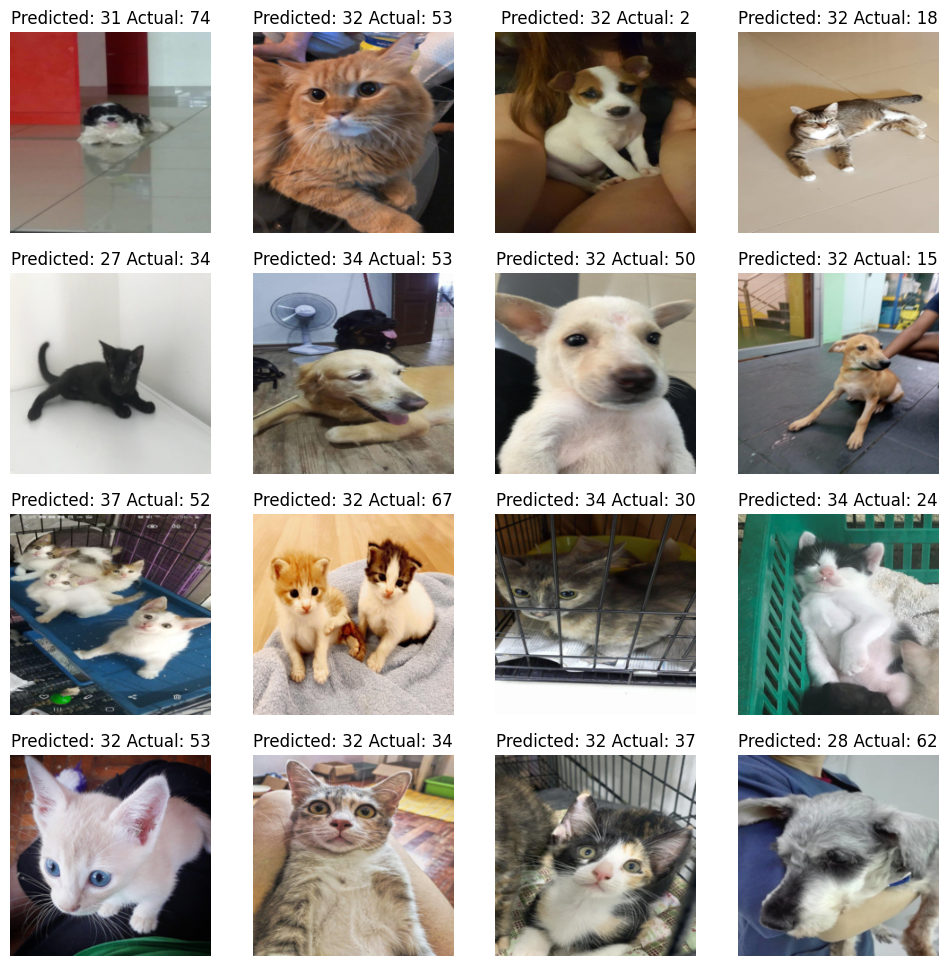

In [27]:
datamodule = PetFinderDataModule(df_train=df_train, df_val=df_val, train_dir=TRAIN_DIR, val_dir=TRAIN_DIR)
data_loader = datamodule.val_dataloader()

data_iter = iter(data_loader)
image_ids, features, images, labels = next(data_iter)

n = 16
plt.figure(figsize=(12, 12))
for it, (image_id, feature, image, label) in enumerate(zip(image_ids[:n], features[:n], images[:n], labels[:n])):
    predicted = clf.predict([feature])[0]

    plt.subplot(4, 4, it+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')
    plt.title(f'Predicted: {int(predicted)} Actual: {int(label)}')